In [7]:
%config IPCompleter.greedy=True
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [9]:
import pandas as pd, numpy as np, os, sys, re, pickle, math, copy
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from IPython.display import display, HTML

def showDF(df):
    display(df.head(4))
    display(df.dtypes)
    display(df.shape)

In [36]:
housing = fetch_california_housing()
housing = pd.DataFrame(housing.data, columns = housing.feature_names)
showDF(housing)

a = housing.as_matrix()[:, 0].reshape(-1, 1) # test reshape
print(a.shape)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25


MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object

(20640, 8)

(20640, 1)


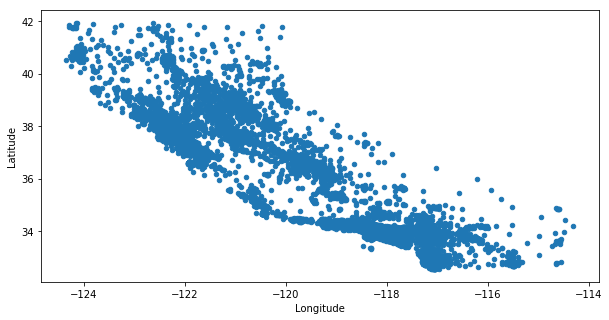

In [37]:
housing.plot(kind='scatter', x='Longitude', y='Latitude', figsize=(10, 5))

In [38]:
from scipy.stats import boxcox

a = housing.as_matrix()[:, 7].reshape(-1,1)
print(np.min(a), np.max(a))
a -= np.min(a) - 1e-5
print(a)
a1, lmbda = boxcox(a)
print("BoxCox-ed:")
print(a1)

from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler().fit(a1)
a2 = scaler.transform(a1)
print("Scaled:")
print(a2)

-124.35 -114.31
[[2.12001]
 [2.13001]
 [2.11001]
 ...
 [3.13001]
 [3.03001]
 [3.11001]]
BoxCox-ed:
[[1.13571041]
 [1.14596152]
 [1.12546088]
 ...
 [2.17809034]
 [2.07431971]
 [2.15732738]]
Scaled:
[[-1.32565921]
 [-1.32077927]
 [-1.3305384 ]
 ...
 [-0.82944471]
 [-0.87884367]
 [-0.83932871]]


In [39]:
# BoxCox + Standardized transformation
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler, MinMaxScaler

class StandardizedBoxCox (BaseEstimator, TransformerMixin):
    def __init__(self):
        self.scaler = StandardScaler()
        return
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        out = None
        lmbdas = []
        for i in range(X.shape[1]):
            print('working on', i)
            col = X[:, i].reshape(-1, 1)
            col -= np.min(col) - 1e-5 # make sure all data are positive
            col, lmbda = boxcox(col)
            lmbdas.append(lmbda)
            
            col = self.scaler.fit(col).transform(col)
            if out is None:
                out = col
            else:
                out = np.c_[out, col]
        return out, lmbdas

working on 0
working on 1
working on 2
working on 3
working on 4
working on 5
working on 6
working on 7


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,1.973032,0.973907,1.050289,-0.274508,-1.611478,-0.350862,1.044085,-1.325659
1,1.965637,-0.562614,0.654056,-0.617175,1.089104,-1.092135,1.037835,-1.320779
2,1.625091,1.749833,1.649967,0.030290,-1.135984,-0.011196,1.034705,-1.330538
3,1.020234,1.749833,0.408488,0.027992,-0.997570,-0.362015,1.034705,-1.335417


MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object

(20640, 8)

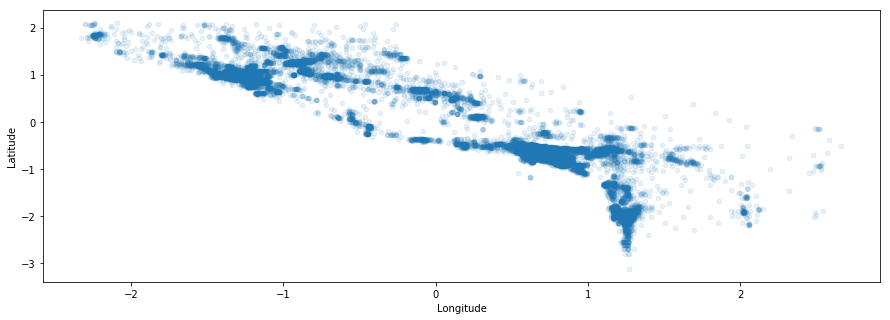

In [43]:
a, lmbdas = StandardizedBoxCox().transform(housing.as_matrix())
x = pd.DataFrame(a, columns = housing.columns)
showDF(x)
x.plot(kind='scatter', x='Longitude', y='Latitude', figsize=(15, 5), alpha=0.1)